#  Classification: premier modèle avec les SVM



<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/2_SVM.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/2_SVM.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/2_SVM.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=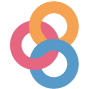)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/modelisation/2_SVM.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/2_SVM.ipynb)

Pour illustrer le travail de données nécessaire pour construire un modèle de Machine Learning, mais aussi nécessaire pour l'exploration de données avant de faire une régression linéaire, nous allons partir du même jeu de données que précédemment,
c'est-à-dire les résultats des élections US 2020 présentés dans l'[introduction
de cette partie](https://linogaliana-teaching.netlify.app/modelisation/): les données de vote aux élections présidentielles US
croisées à des variables socio-démographiques.
Le code 
est disponible [sur Github](https://github.com/linogaliana/python-datascientist/blob/master/content/modelisation/get_data.py)






## La méthode des SVM (Support Vector Machines)

L'une des méthodes de *Machine Learning* les plus utilisées en classification est les SVM. Il s'agit de trouver, dans un système de projection adéquat (noyau ou *kernel*), les paramètres de l'hyperplan (en fait d'un hyperplan à marges maximales) séparant les classes de données: 

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

On peut, sans perdre de généralité, supposer que le problème consiste à supposer l'existence d'une loi de probabilité $\mathbb{P}(x,y)$ ($\mathbb{P} \to \{-1,1\}$) qui est inconnue. Le problème de discrimination
vise à construire un estimateur de la fonction de décision idéale qui minimise la probabilité d'erreur, autrement dit $\theta = \arg\min_\Theta \mathbb{P}(h_\theta(X) \neq y |x)$

Les SVM les plus simples sont les SVM linéaires. Dans ce cas, on suppose qu'il existe un séparateur linéaire qui permet d'associer chaque classe à son signe:

$$
h_\theta(x) = \text{signe}(f_\theta(x)) ; \text{ avec } f_\theta(x) = \theta^T x + b
$$
avec $\theta \in \mathbb{R}^p$ et $w \in \mathbb{R}$. 

![](https://en.wikipedia.org/wiki/File:SVM_margin.png)

Lorsque des observations sont linéairement séparables, il existe une infinité de frontières de décision linéaire séparant les deux classes. Le "meilleur" choix est de prendre la marge maximale permettant de séparer les données. La distance entre les deux marges est $\frac{2}{||\theta||}$. Donc maximiser cette distance entre deux hyperplans revient à minimiser $||\theta||^2$ sous la contrainte $y_i(\theta^Tx_i + b) \geq 1$. 

Dans le cas non linéairement séparable, la *hinge loss* $\max\big(0,y_i(\theta^Tx_i + b)\big)$ permet de linéariser la fonction de perte:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Hinge_loss_vs_zero_one_loss.svg/1024px-Hinge_loss_vs_zero_one_loss.svg.png)

ce qui donne le programme d'optimisation suivant:

$$
\frac{1}{n} \sum_{i=1}^n \max\big(0,y_i(\theta^Tx_i + b)\big) + \lambda ||\theta||^2
$$

La généralisation au cas non linéaire implique d'introduire des noyaux transformant l'espace de coordonnées des observations.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png)


## Exercice

1. Créer une variable *dummy* `y` dont la valeur vaut 1 quand les républicains l'emportent
2. Créer des échantillons de test (20% des observations) et d'estimation avec comme *features*: `'Unemployment_rate_2019', 'Median_Household_Income_2019', 'Percent of adults with less than a high school diploma, 2015-19', "Percent of adults with a bachelor's degree or higher, 2015-19"` et comme *label* la variable `y`. Pour éviter le *warning* 

> A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

à chaque fois que vous estimez votre modèle, vous pouvez utiliser `DataFrame[['y']].values.ravel()` plutôt que `DataFrame[['y']]` lorsque vous constituez vos échantillons.

3. Entraîner un classifieur SVM avec comme paramètre de régularisation `C = 1`. Regarder les mesures de performance suivante: `accuracy`, `f1`, `recall` et `precision`. Vérifier la matrice de confusion: vous devriez voir que malgré des scores en apparence pas si mauvais, il y a un problème

4. Refaire les questions précédentes avec des variables normalisées. Le résultat est-il différent ?

5. Changer de variables *x*. Prendre uniquement `votes_gop` et `Median_Household_Income_2019`. Regarder les résultats, notamment la matrice de confusion

6. Faire une 5-fold validation croisée pour déterminer le paramètre *C* idéal. 


Le classifieur avec `C = 1` devrait avoir les performances suivantes:

| Métrique | Score |
|----------|-------|
| Accuracy | 0.8665595 |
| Recall | 0.8732394 |
| Precision | 0.9783037 |
| F1 | 0.9227907 |



Notre classifieur manque totalement les *labels* 0, qui sont minoritaires. Une raison possible ? L'échelle des variables: le revenu a une distribution qui peut écraser celle des autres variables, dans un modèle linéaire. Il faut donc, a minima, standardiser les variables. Néanmoins, ici cela n'apporte pas de gain:

```
## <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7faa24842cd0>
```


Il faut donc aller plus loin : le problème ne vient pas de l'échelle mais du choix des variables.
C'est pour cette raison que l'étape de sélection de variable est cruciale. En utilisant uniquement le résultat passé du vote démocrate et le revenu (`votes_gop` et `Median_Household_Income_2019`), on obtient un résultat beaucoup plus cohérent:

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: "['share_2016_republican'] not in index"
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/geodataframe.py", line 1299, in __getitem__
##     result = super(GeoDataFrame, self).__getitem__(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3461, in __getitem__
##     indexer = self.loc._get_listlike_indexer(key, axis=1)[1]
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1314, in _get_listlike_indexer
##     self._validate_read_indexer(keyarr, indexer, axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1377, in _validate_read_indexer
##     raise KeyError(f"{not_found} not in index")
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: "['share_2016_republican'] not in index"
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/geodataframe.py", line 1299, in __getitem__
##     result = super(GeoDataFrame, self).__getitem__(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3461, in __getitem__
##     indexer = self.loc._get_listlike_indexer(key, axis=1)[1]
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1314, in _get_listlike_indexer
##     self._validate_read_indexer(keyarr, indexer, axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1377, in _validate_read_indexer
##     raise KeyError(f"{not_found} not in index")
```

```
## <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7faa2482e430>
```

| Métrique | Score |
|----------|-------|
| Accuracy | 0.8633441 |
| Recall | 0.8650519 |
| Precision | 0.9861933 |
| F1 | 0.921659 |